# Data Preprocessing [NLTK]

**匯入資料**

In [3]:
import json
import pandas as pd

jsonFile = open('/content/ML-ESG-3_Trainset_English.json','r')
Data = json.load(jsonFile)
print(Data)

df = pd.DataFrame(Data)
pd.set_option('display.max_colwidth', 10)
print(df)

[{'URL': 'https://www.esgtoday.com/arabesque-ai-appoints-carolina-minio-paluello-as-new-ceo/', 'news_title': 'Arabesque AI Appoints Carolina Minio Paluello as New CEO', 'news_content': 'ESG-focused financial technology company Arabesque AI announced today the appointment of Dr. Carolina Minio Paluello as the company’s new Chief Executive Officer.', 'impact_level': 'low', 'impact_length': '2 to 5 years'}, {'URL': 'https://www.esgtoday.com/arabesque-ai-appoints-carolina-minio-paluello-as-new-ceo/', 'news_title': 'Arabesque AI Appoints Carolina Minio Paluello as New CEO', 'news_content': 'The company also announced the appointment of Tim Wong as its new Chief Product Officer. Joining from Finbourne Technology, where he oversaw product development for investment and portfolio management software, Wong also holds several years of experience in product management and strategy consulting at companies including Amazon, Capco, McKinsey and PwC.', 'impact_level': 'low', 'impact_length': '2 to 5 

**Tokenize & Label Encoding（轉成數字）**

In [4]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize news_title column
df['tokenized_title'] = df['news_title'].apply(word_tokenize)
df['tokenized_content'] = df['news_content'].apply(word_tokenize)

# Create a vocabulary of unique tokens
vocabulary = set()
for tokens in df['tokenized_title']:
    vocabulary.update(tokens)
for tokens in df['tokenized_content']:
    vocabulary.update(tokens)

# Create a mapping from tokens to integer identifiers
token_to_id = {token: i + 1 for i, token in enumerate(vocabulary)}  # Start numbering from 1

# Numericalize
df['numericalized_title'] = df['tokenized_title'].apply(lambda x: [token_to_id[token] for token in x])
df['numericalized_content'] = df['tokenized_content'].apply(lambda x: [token_to_id[token] for token in x])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
df

,URL,news_title,news_content,impact_level,impact_length,tokenized_title,tokenized_content,numericalized_title,numericalized_content
0,https:...,Arabes...,ESG-fo...,low,2 to 5...,[Arabe...,[ESG-f...,"[4086,...","[523, ..."
1,https:...,Arabes...,The co...,low,2 to 5...,[Arabe...,"[The, ...","[4086,...","[3012,..."
2,https:...,Arabes...,Wong s...,medium,2 to 5...,[Arabe...,"[Wong,...","[4086,...","[272, ..."
3,https:...,Ukrain...,One of...,high,More t...,[Ukrai...,"[One, ...","[3753,...","[4151,..."
4,https:...,EU Reg...,Europe...,medium,Less t...,"[EU, R...",[Europ...,"[5283,...","[4769,..."
...,...,...,...,...,...,...,...,...,...
540,https:...,Methan...,Stefan...,low,2 to 5...,[Metha...,[Stefa...,"[1561,...","[6205,..."
541,https:...,Eaton ...,Eaton ...,low,2 to 5...,[Eaton...,[Eaton...,"[5276,...","[5276,..."
542,https:...,SSGA O...,In his...,medium,Less t...,"[SSGA,...","[In, h...","[1379,...","[6379,..."
543,https:...,Survey...,O’Brie...,low,Less t...,[Surve...,"[O, ’,...","[2223,...","[2447,..."


**One-hot Encoding：將 Impact Level, Impact Length encode，轉成數字形式**

In [6]:
from sklearn.preprocessing import LabelEncoder

dfy = {}

# Perform label encoding for y1 (df['impact_level'])
label_encoder_y1 = LabelEncoder()
dfy['y1_labelencoded'] = label_encoder_y1.fit_transform(df['impact_level'])

# Perform label encoding for y2 (df['impact_length'])
label_encoder_y2 = LabelEncoder()
dfy['y2_labelencoded'] = label_encoder_y2.fit_transform(df['impact_length'])


In [7]:
dfy['y1_labelencoded']=dfy['y1_labelencoded'].reshape(-1, 1)
dfy['y2_labelencoded']=dfy['y2_labelencoded'].reshape(-1, 1)

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
onehotencoder = OneHotEncoder()

# Fit and transform the label-encoded y1 and y2
y1_encoded = onehotencoder.fit_transform(dfy['y1_labelencoded']).toarray()
y2_encoded = onehotencoder.fit_transform(dfy['y2_labelencoded']).toarray()

# Convert the encoded arrays to DataFrames
df_y1_encoded = pd.DataFrame(y1_encoded)
df_y2_encoded = pd.DataFrame(y2_encoded)

print(df_y1_encoded)
print(df_y2_encoded)

       0    1    2
0    0.0  1.0  0.0
1    0.0  1.0  0.0
2    0.0  0.0  1.0
3    1.0  0.0  0.0
4    0.0  0.0  1.0
..   ...  ...  ...
540  0.0  1.0  0.0
541  0.0  1.0  0.0
542  0.0  0.0  1.0
543  0.0  1.0  0.0
544  0.0  0.0  1.0

[545 rows x 3 columns]
       0    1    2
0    1.0  0.0  0.0
1    1.0  0.0  0.0
2    1.0  0.0  0.0
3    0.0  0.0  1.0
4    0.0  1.0  0.0
..   ...  ...  ...
540  1.0  0.0  0.0
541  1.0  0.0  0.0
542  0.0  1.0  0.0
543  0.0  1.0  0.0
544  1.0  0.0  0.0

[545 rows x 3 columns]


**把所有資料轉成相同長度（tilte,content,impact_level,impact_length），長度設為content的max**

In [9]:
max_seq_len_title = max(len(seq) for seq in df['numericalized_title'])
print("title max length:", max_seq_len_title)

max_seq_len_content = max(len(seq) for seq in df['numericalized_content'])
print("content max length:", max_seq_len_content)

title max length: 26
content max length: 216


In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#序列預處理pad_sequences()序列填充
def pad_sequence(sequence):
    return pad_sequences([sequence], maxlen=max_seq_len_content, padding='pre', truncating='pre', value=0)[0]

df['numseq_title'] =  df['numericalized_title']
df['numseq_title'] = df['numericalized_title'].apply(pad_sequence)

df['numseq_content'] =  df['numericalized_content']
df['numseq_content'] = df['numericalized_content'].apply(pad_sequence)

print(df['numseq_title'])
print(df['numseq_content'])
print(max_seq_len_content)

0      [0, 0,...
1      [0, 0,...
2      [0, 0,...
3      [0, 0,...
4      [0, 0,...
         ...    
540    [0, 0,...
541    [0, 0,...
542    [0, 0,...
543    [0, 0,...
544    [0, 0,...
Name: numseq_title, Length: 545, dtype: object
0      [0, 0,...
1      [0, 0,...
2      [0, 0,...
3      [0, 0,...
4      [0, 0,...
         ...    
540    [0, 0,...
541    [0, 0,...
542    [0, 0,...
543    [0, 0,...
544    [0, 0,...
Name: numseq_content, Length: 545, dtype: object
216


# Split Training and Validation Set

**區分 Training and Validation Set**

In [11]:
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target variables (y1, y2)
X = df[['numseq_title', 'numseq_content']]  # Features
'''
y1 = df['y1_encoded_seq'].to_frame()  # Target variable 1
y2 = df['y2_encoded_seq'].to_frame() # Target variable 2
'''

# Splitting data into a common training and validation set
X_train, X_valid, y_train1, y_valid1, y_train2, y_valid2 = train_test_split(X, df_y1_encoded, df_y2_encoded, test_size=0.2, random_state=42)

In [12]:
# Displaying the shapes and types of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Type of X_train:",type(X_train))
print("Type of X_valid:",type(X_valid))
print("Shape of y_train1:", y_train1.shape)
print("Shape of y_valid1:", y_valid1.shape)
print("Type of y_train1:",type(y_train1))
print("Type of y_valid1:",type(y_valid1))
print("Shape of y_train2:", y_train2.shape)
print("Shape of y_valid2:", y_valid2.shape)
print("Type of y_train2:",type(y_train2))
print("Type of y_valid2:",type(y_valid2))


Shape of X_train: (436, 2)
Shape of X_valid: (109, 2)
Type of X_train: <class 'pandas.core.frame.DataFrame'>
Type of X_valid: <class 'pandas.core.frame.DataFrame'>
Shape of y_train1: (436, 3)
Shape of y_valid1: (109, 3)
Type of y_train1: <class 'pandas.core.frame.DataFrame'>
Type of y_valid1: <class 'pandas.core.frame.DataFrame'>
Shape of y_train2: (436, 3)
Shape of y_valid2: (109, 3)
Type of y_train2: <class 'pandas.core.frame.DataFrame'>
Type of y_valid2: <class 'pandas.core.frame.DataFrame'>


# LTSM model

In [13]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, concatenate,Embedding

# Define input
input_title = Input(shape=(216,), name='input_title')
input_content = Input(shape=(216,), name='input_content')

**Embedding 層：用於將文本轉換為向量的層**

In [14]:
embedding_title = Embedding(input_dim=6950,output_dim=128,input_length=216)(input_title)
embedding_content = Embedding(input_dim=6950,output_dim=128,input_length=216)(input_content)

**LTSM層：長短期記憶網絡的縮寫，是一種被廣泛用於自然語言處理的神經網絡架構**

In [15]:
lstm_title = LSTM(128)(embedding_title)
lstm_content = LSTM(128)(embedding_content)

**Dense層：Keras 中的實現全連接層（Fully Connected Layer），用於將輸入數據映射到輸出數據**

In [16]:
# Merge title and content branches
merged = concatenate([lstm_title, lstm_content])

# Additional dense layers
dense1 = Dense(64, activation='relu')(merged)

# Output layer for task 1
output1 = Dense(3, activation='softmax', name='output1')(dense1)

# Output layer for task 2
output2 = Dense(3, activation='softmax', name='output2')(dense1)

**Compile the model**

In [17]:
# Define the model
model = Model(inputs=[input_title, input_content], outputs=[output1, output2])

# Compile the model
model.compile(optimizer='adam',
              loss={'output1': 'binary_crossentropy', 'output2': 'binary_crossentropy'},
              metrics=['accuracy'])

In [23]:
import numpy as np
X_train_title_arr = np.array(X_train['numseq_title'].tolist())
X_train_content_arr = np.array(X_train['numseq_content'].tolist())
X_valid_title_arr = np.array(X_valid['numseq_title'].tolist())
X_valid_content_arr = np.array(X_valid['numseq_content'].tolist())

In [25]:
# 1. Check Data Shapes
print("Shape of X_train_title_arr:", X_train_title_arr.shape)
print("Shape of X_train_content_arr:", X_train_content_arr.shape)
print("Shape of y_train1_arr:", y_train1.shape)
print("Shape of y_train2_arr:", y_train2.shape)

# 2. Check Data Types
print("Data type of X_train_title_arr:", X_train_title_arr.dtype)
print("Data type of X_train_content_arr:", X_train_content_arr.dtype)
print("Data type of y_train1_arr:", type(y_train1))
print("Data type of y_train2_arr:", type(y_train2))

# 3. Check Label Encoding
print("Unique values in y_train1_arr:", np.unique(y_train1))
print("Unique values in y_train2_arr:", np.unique(y_train2))

# 6. Check Model Summary
model.summary()


Shape of X_train_title_arr: (436, 216)
Shape of X_train_content_arr: (436, 216)
Shape of y_train1_arr: (436, 3)
Shape of y_train2_arr: (436, 3)
Data type of X_train_title_arr: int32
Data type of X_train_content_arr: int32
Data type of y_train1_arr: <class 'pandas.core.frame.DataFrame'>
Data type of y_train2_arr: <class 'pandas.core.frame.DataFrame'>
Unique values in y_train1_arr: [0. 1.]
Unique values in y_train2_arr: [0. 1.]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_title (InputLayer)    [(None, 216)]                0         []                            
                                                                                                  
 input_content (InputLayer)  [(None, 216)]                0         []                            
                                                            

**Train the model**

In [33]:
# Train the model
history = model.fit({'input_title': X_train_title_arr, 'input_content': X_train_content_arr},
                    {'output1': y_train1, 'output2': y_train2},
                    validation_data=({'input_title': X_valid_title_arr, 'input_content':X_valid_content_arr},
                                     {'output1': y_valid1, 'output2': y_valid2}),
                    epochs=7, batch_size=32)

Epoch 1/7
14/14 [==============================] - 12s 845ms/step - loss: 0.0209 - output1_loss: 0.0101 - output2_loss: 0.0108 - output1_accuracy: 0.9977 - output2_accuracy: 1.0000 - val_loss: 2.5275 - val_output1_loss: 1.4450 - val_output2_loss: 1.0825 - val_output1_accuracy: 0.5046 - val_output2_accuracy: 0.5138
Epoch 2/7
14/14 [==============================] - 10s 704ms/step - loss: 0.0107 - output1_loss: 0.0046 - output2_loss: 0.0061 - output1_accuracy: 1.0000 - output2_accuracy: 0.9977 - val_loss: 2.6324 - val_output1_loss: 1.4561 - val_output2_loss: 1.1763 - val_output1_accuracy: 0.4954 - val_output2_accuracy: 0.5596
Epoch 3/7
14/14 [==============================] - 9s 671ms/step - loss: 0.0062 - output1_loss: 0.0034 - output2_loss: 0.0028 - output1_accuracy: 1.0000 - output2_accuracy: 1.0000 - val_loss: 2.6520 - val_output1_loss: 1.4517 - val_output2_loss: 1.2003 - val_output1_accuracy: 0.4954 - val_output2_accuracy: 0.5505
Epoch 4/7
14/14 [==============================] - 9s

# Evaluation

In [34]:
from sklearn import metrics

# Predict on the validation data
y_pred1, y_pred2 = model.predict({'input_title': X_valid_title_arr, 'input_content': X_valid_content_arr})

print("Evaluation for Output 1:")
print(metrics.classification_report(np.argmax(y_pred1,axis=1),np.argmax(y_valid1.values,axis=1)))
print("Evaluation for Output 2:")
print(metrics.classification_report(np.argmax(y_pred2,axis=1),np.argmax(y_valid2.values,axis=1)))

4/4 [==============================] - 1s 146ms/step
Evaluation for Output 1:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59        31
           1       0.43      0.33      0.38        36
           2       0.48      0.55      0.51        42

    accuracy                           0.50       109
   macro avg       0.49      0.50      0.49       109
weighted avg       0.49      0.50      0.49       109

Evaluation for Output 2:
              precision    recall  f1-score   support

           0       0.56      0.55      0.55        44
           1       0.37      0.35      0.36        20
           2       0.60      0.62      0.61        45

    accuracy                           0.54       109
   macro avg       0.51      0.51      0.51       109
weighted avg       0.54      0.54      0.54       109



**Check if overfitting**

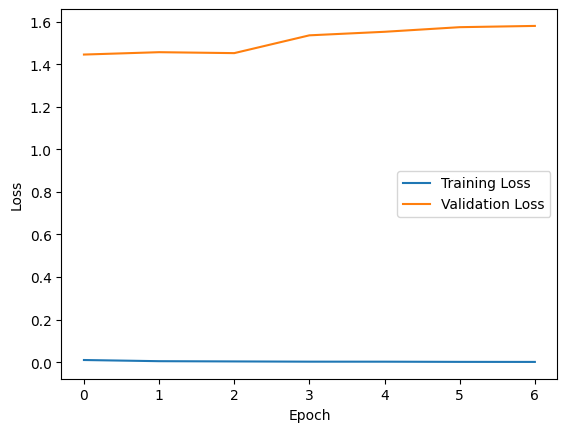

In [35]:
import matplotlib.pyplot as plt

# Plot training and validation loss for output1
plt.plot(history.history['output1_loss'], label='Training Loss')
plt.plot(history.history['val_output1_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

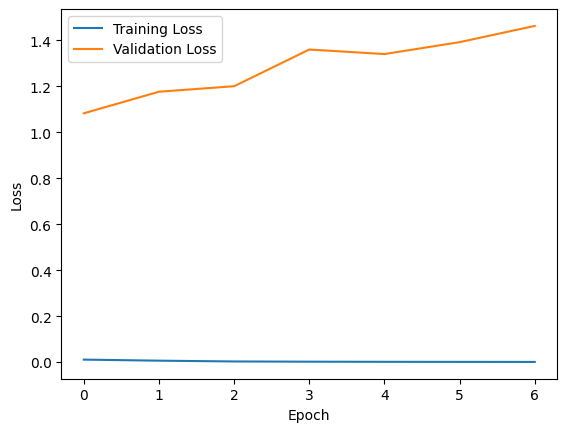

In [36]:
# Plot training and validation loss for output2
plt.plot(history.history['output2_loss'], label='Training Loss')
plt.plot(history.history['val_output2_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

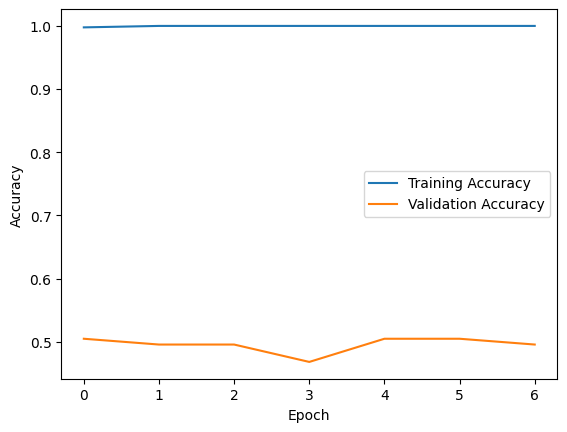

In [37]:
# Plot training and validation accuracy for output1
plt.plot(history.history['output1_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_output1_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

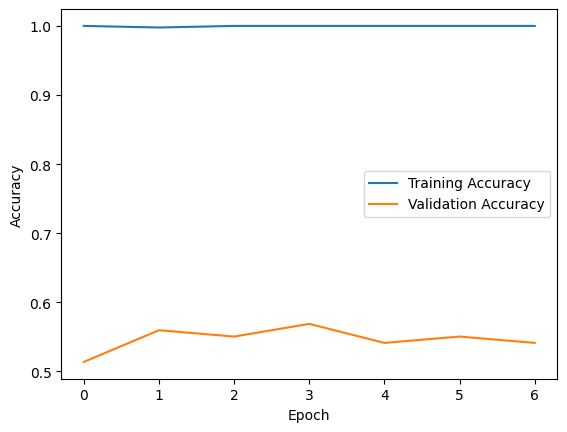

In [38]:
# Plot training and validation accuracy for output2
plt.plot(history.history['output2_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_output2_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# References

https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87

https://hsin-life.com/archives/2328


https://ithelp.ithome.com.tw/articles/10308248?sc=rss.iron